# Clustering Model

### Summary: 

In the baseline model, located in `../baseline_models/clustering_model.ipynb`, 
- we extracted `sentences_df.csv` dataset from the original `ner_dataset.csv',  
- applied two vectorization algorithms, `CountVectorizer` and `TfidfVectorizer`, to convert _shortened sentences_ (original sentences with stopwords removed) to vectors, 
- and finally, used the KMeans clustering algorithm to cluster sentences. 

The Silhouette scores of the resulting clusterings were extremely low (less than $0.1$). 

In this notebook, 
- we improve the model by adding **lemmatization** and **dimension reduction** layers.  
- In addition to KMeans, we also tried `AgglomerativeClustering`, but it took too long to run on the entire dataset.  

### Load the dataset `sentences_v1.csv`, created in the baseline mode

In [1]:
import pandas as pd 
import numpy as np

sentences_df = pd.read_csv('sentences_v1.csv')
extended_df = pd.read_csv('extended_df.csv')

In [2]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [3]:
sentences_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Sentence Length', 'Sentence#', 'Content',
       'Tagged Words', 'Shortened Sentences'],
      dtype='object')

Drop columns `'Unnamed: 0.1', 'Unnamed: 0'`. 

In [4]:
sentences_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [5]:
sentences_df.head()

,Sentence Length,Sentence#,Content,Tagged Words,Shortened Sentences
0,24,1,"['Thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'London', 'to', 'protest', 'the', 'war', 'in', 'Iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'British', 'troops', 'from', 'that', 'country', '.']","['London', 'Iraq', 'British']",Thousands demonstrators marched London protest war Iraq demand withdrawal British troops country .
1,30,2,"['Families', 'of', 'soldiers', 'killed', 'in', 'the', 'conflict', 'joined', 'the', 'protesters', 'who', 'carried', 'banners', 'with', 'such', 'slogans', 'as', '""', 'Bush', 'Number', 'One', 'Terrorist', '""', 'and', '""', 'Stop', 'the', 'Bombings', '.', '""']",['Bush'],"Families soldiers killed conflict joined protesters carried banners slogans "" Bush Number Terrorist "" "" Stop Bombings . """
2,14,3,"['They', 'marched', 'from', 'the', 'Houses', 'of', 'Parliament', 'to', 'a', 'rally', 'in', 'Hyde', 'Park', '.']","['Hyde', 'Park']",marched Houses Parliament rally Hyde Park .
3,15,4,"['Police', 'put', 'the', 'number', 'of', 'marchers', 'at', '10,000', 'while', 'organizers', 'claimed', 'it', 'was', '1,00,000', '.']",NaN,"Police number marchers 10,000 organizers claimed 1,00,000 ."
4,25,5,"['The', 'protest', 'comes', 'on', 'the', 'eve', 'of', 'the', 'annual', 'conference', 'of', 'Britain', ""'s"", 'ruling', 'Labor', 'Party', 'in', 'the', 'southern', 'English', 'seaside', 'resort', 'of', 'Brighton', '.']","['Britain', 'Labor', 'Party', 'English', 'Brighton']",protest comes eve annual conference Britain ruling Labor Party southern English seaside resort Brighton .


### Vectorization and Lemmatization

In [6]:
shortened_sent = sentences_df['Shortened Sentences']

##### Drop an **invaid** sentence 

In [7]:
shortened_sent[shortened_sent.isna()]

8411    NaN
Name: Shortened Sentences, dtype: object

In [8]:
sentences_df.iloc[8409: 8413]

,Sentence Length,Sentence#,Content,Tagged Words,Shortened Sentences
8409,33,8410,"['A', 'STATE', 'Official', 'carrying', 'off', 'the', 'Dome', 'of', 'the', 'Capitol', 'met', 'the', 'Ghost', 'of', 'his', 'predecessor', ',', 'who', 'had', 'come', 'out', 'of', 'his', 'political', 'grave', 'to', 'warn', 'him', 'that', 'God', 'saw', 'him', '.']","['Dome', 'of', 'the', 'Capitol']","STATE Official carrying Dome Capitol met Ghost predecessor , come political grave warn God saw ."
8410,34,8411,"['As', 'the', 'place', 'of', 'meeting', 'was', 'lonely', 'and', 'the', 'time', 'midnight', ',', 'the', 'State', 'Official', 'set', 'down', 'the', 'Dome', 'of', 'the', 'Capitol', ',', 'and', 'commanded', 'the', 'supposed', 'traveller', 'to', 'throw', 'up', 'his', 'hands', '.']","['midnight', 'State', 'Official', 'Dome', 'of', 'the', 'Capitol']","place meeting lonely time midnight , State Official set Dome Capitol , commanded supposed traveller throw hands ."
8411,1,8412,['The'],NaN,NaN
8412,28,8413,"['Ghost', 'replied', 'that', 'he', 'had', 'not', 'eaten', 'them', ',', 'and', 'while', 'he', 'was', 'explaining', 'the', 'situation', 'another', 'State', 'Official', 'silently', 'added', 'the', 'dome', 'to', 'his', 'own', 'collection', '.']","['State', 'Official']","Ghost replied eaten , explaining situation State Official silently added dome collection ."


In [9]:
shortened_sent.drop(8411, inplace=True)

In [10]:
shortened_sent.isna().sum()

0

##### Vectorization and Lemmatization classes

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

In [16]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Define the `LemmaTokenizer` class. 

In [13]:
## code is adapted from sklearn: https://scikit-learn.org/stable/modules/feature_extraction.html

class LemmaTokenizer:
    def __init__(self) -> None:
        self.wnl = WordNetLemmatizer()
    
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in doc.lower().split(' ')]

The following code is to test the `LemmaTokenizer` class. There is no need to initialize tokenizer here.  

In [ ]:
#vectorizer_bow = CountVectorizer(tokenizer=LemmaTokenizer())
#tokenized_sent = vectorizer_bow.fit_transform(shortened_sent)
#tokenized_sent.shape

(47958, 28760)

Each sentence is represented by a $28760$ dim vector. Oddly, the dimension is increased after using lemmatization.

In [ ]:
#tokenized_sent_wolema = CountVectorizer().fit_transform(shortened_sent)
#tokenized_sent_wolema.shape

(47958, 27706)

##### word2vec for future reference

In [ ]:
## Download the full model 
# import gensim.downloader as api 
# wv = api.load('word2vec-google-news-300')

## Clustering Models

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Model 1: `CountVectorizer` with `tokenizer=LemmaTokenizer()` + `KMeans`

- When `n_cluster=2`, Silhouette Coefficient is 0.28244613563900284 for `random_states=1, 5, 10, 42`
- When `n_cluster=3`, Silhouette Coefficient is 0.17099173313074406 for `random_states=0, 1`

This is a substantial improvement comparing to the baseline model, which has Silhouette Coefficient less than 0.1 


In [17]:
shortened_sent_bow = CountVectorizer(tokenizer=LemmaTokenizer()).fit_transform(shortened_sent)

In [18]:
shortened_sent_bow.shape

(47958, 28760)

Fit and evaluate K-Mean model

In [19]:
for random_state in [0, 42]: 
    for n_cluster in range(2,7):
        kmeans_model = KMeans(n_clusters=n_cluster, random_state=random_state).fit(shortened_sent_bow)
        labels = kmeans_model.labels_

        # print(f'Calinski-Harabasz Index: {calinski_harabasz_score(sample_data, labels)}')
        # print(f'Davies-Bouldin Index: {davies_bouldin_score(sample_data, labels)}')
        print(f'n_clusters = {n_cluster}, random_state = {random_state}: Silhouette Coefficient: {silhouette_score(shortened_sent_bow, labels)}')

n_clusters = 2, random_state = 0: Silhouette Coefficient: 0.28244613563900284
n_clusters = 3, random_state = 0: Silhouette Coefficient: 0.17099173313074406
n_clusters = 4, random_state = 0: Silhouette Coefficient: 0.12557863515767284
n_clusters = 5, random_state = 0: Silhouette Coefficient: 0.09898807800970112
n_clusters = 6, random_state = 0: Silhouette Coefficient: 0.0744724413531645
n_clusters = 2, random_state = 42: Silhouette Coefficient: 0.28244613563900284
n_clusters = 3, random_state = 42: Silhouette Coefficient: 0.17099173313074406
n_clusters = 4, random_state = 42: Silhouette Coefficient: 0.12557863515767284
n_clusters = 5, random_state = 42: Silhouette Coefficient: 0.08495609538504267
n_clusters = 6, random_state = 42: Silhouette Coefficient: 0.06238820629252307


Inspect the core sentences when `n_cluster = 2`

In [20]:
kmeans = KMeans(n_clusters=2)
sent_dist = kmeans.fit_transform(shortened_sent_bow)
representative_sent_idx = np.argmin(sent_dist, axis=0)
representative_sent = sentences_df.iloc[representative_sent_idx]

In [21]:
pd.set_option('display.max_colwidth', -1)
representative_sent['Content']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


16893    ['One', 'time', 'I', 'had', 'to', 'go', 'to', 'a', 'funeral', 'at', '6', 'AM', '.']                                                                                       
33172    ['Authorities', 'say', 'Commander', 'Victor', 'Berrones', 'died', 'Tuesday', 'when', 'gunmen', 'attacked', 'the', 'vehicle', 'in', 'which', 'he', 'was', 'traveling', '.']
Name: Content, dtype: object

Inspect the core sentences when `n_cluster = 3`

In [22]:
kmeans = KMeans(n_clusters=3)
sent_dist = kmeans.fit_transform(shortened_sent_bow)
representative_sent_idx = np.argmin(sent_dist, axis=0)
representative_sent = sentences_df.iloc[representative_sent_idx]

In [23]:
representative_sent['Content']

13830    ['"', 'The', 'next', 'time', 'you', 'touch', 'a', 'Nettle', ',', 'grasp', 'it', 'boldly', ',', 'and', 'it', 'will', 'be', 'soft', 'as', 'silk', 'to', 'your', 'hand', ',', 'and', 'not', 'in', 'the', 'least', 'hurt', 'you', '.', '"']
40246    ['One', 'of', 'them', 'got', 'terribly', 'sick', '.']                                                                                                                                                                                  
44758    ['Officials', 'say', 'the', 'strike', 'hit', 'a', 'Palestinian', 'militant', 'training', 'camp', '.']                                                                                                                                  
Name: Content, dtype: object

In [24]:
sent_dist.max()

42.14102267137398

### Model 2 (Not good): `TfidfVectorizer` with `tokenizer=LemmaTokenizer()` + `KMeans`

- Using `TfidfVectorizer` results in much worse performance than `CountVectorizer` 

In [25]:
shortened_sent_tfidf = TfidfVectorizer(tokenizer=LemmaTokenizer()).fit_transform(shortened_sent)

In [26]:
shortened_sent_tfidf.shape

(47958, 28760)

In [27]:
for n_cluster in range(2, 4):
    kmeans_model = KMeans(n_clusters=n_cluster, random_state=random_state).fit(shortened_sent_tfidf)
    labels = kmeans_model.labels_
    # print(f'Calinski-Harabasz Index: {calinski_harabasz_score(sample_data, labels)}')
    # print(f'Davies-Bouldin Index: {davies_bouldin_score(sample_data, labels)}')
    print(f'n_clusters = {n_cluster}: Silhouette Coefficient: {silhouette_score(shortened_sent_tfidf, labels)}')

n_clusters = 2: Silhouette Coefficient: 0.008146341934268077
n_clusters = 3: Silhouette Coefficient: 0.0001574860473659159


### Model 3: `CountVectorizer` with `tokenizer=LemmaTokenizer()` + `TruncatedSVD` + `KMeans`

**Remark**: `PCA` class doesn't support sparse input. Instead, we use `TruncatedSVD` (Latent semantic analysis) for dimension reduction.

We drop the dimension to 100 and the performance is exactly the same as before the dimension reduction. 

In [28]:
from sklearn.decomposition import TruncatedSVD

In [29]:
shortened_sent_bow = CountVectorizer(tokenizer=LemmaTokenizer()).fit_transform(shortened_sent)

In [30]:
lsa = TruncatedSVD(n_components=100)
shortened_sent_reducded = lsa.fit_transform(shortened_sent_bow)

In [31]:
lsa.explained_variance_ratio_[:10]

array([0.50368223, 0.03100053, 0.00577348, 0.0062948 , 0.00417825,
       0.00403233, 0.00384653, 0.00317059, 0.00308567, 0.00299286])

In [32]:
lsa.explained_variance_ratio_.sum()

0.6665069909054182

In [33]:
for random_state in [0, 42]: 
    for n_cluster in range(2,5):
        kmeans_model = KMeans(n_clusters=n_cluster, random_state=random_state).fit(shortened_sent_reducded)
        labels = kmeans_model.labels_

        # print(f'Calinski-Harabasz Index: {calinski_harabasz_score(sample_data, labels)}')
        # print(f'Davies-Bouldin Index: {davies_bouldin_score(sample_data, labels)}')
        print(f'n_clusters = {n_cluster}, random_state = {random_state}: Silhouette Coefficient: {silhouette_score(shortened_sent_bow, labels)}')

n_clusters = 2, random_state = 0: Silhouette Coefficient: 0.28244613563900284
n_clusters = 3, random_state = 0: Silhouette Coefficient: 0.17408942048164627
n_clusters = 4, random_state = 0: Silhouette Coefficient: 0.12557863515767284
n_clusters = 2, random_state = 42: Silhouette Coefficient: 0.28244613563900284
n_clusters = 3, random_state = 42: Silhouette Coefficient: 0.17099173313074406
n_clusters = 4, random_state = 42: Silhouette Coefficient: 0.12559189340614785


### `CountVectorizer` with `tokenizer=LemmaTokenizer()` + `TruncatedSVD` + `AgglomerativeClustering`

- This model still needs to be evaluated. 
- It takes too long to run on the entire dataset. 

In [34]:
from sklearn.cluster import AgglomerativeClustering

In [38]:
preprocessing_pipeline = Pipeline([
    ('tokenizer', CountVectorizer(tokenizer=LemmaTokenizer())),
    ('dim_reduction', TruncatedSVD(n_components=100)),
])

shortened_sent_reduced = preprocessing_pipeline.fit_transform(shortened_sent)

In [39]:
agg_clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [56]:
shortened_sent_reducded.shape

(47958, 100)

In [57]:
## Warning: The full dataset took too long to finish. 

agg_clustering.fit(shortened_sent_reduced[:10000])

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

Plot the Dendrogram

Acknowledgement: The code is adapted from https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html


In [51]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

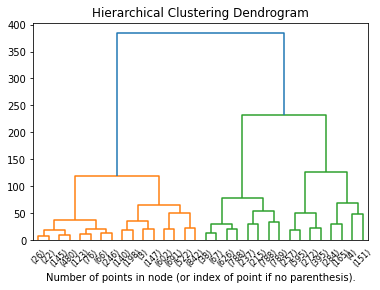

In [58]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_clustering, truncate_mode="level", p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()